# **Analisis de datos sobre arrestos en NY.**

**Diccionario de columnas:**

- ARREST_KEY = Randomly generated persistent ID for each arrest
- ARREST_DATE = Exact date of arrest for the reported event
- PD_CD = Three digit internal classification code (more granular than Key Code)
- PD_DESCD = Description of internal classification corresponding with PD code (more granular than Offense Description)
- KY_CD = Three digit internal classification code (more general category than PD code)
- OFNS_DESC = Description of internal classification corresponding with KY code (more general category than PD description)
- LAW_CODE = Law code charges corresponding to the NYS Penal Law, VTL and other various local laws
- LAW_CAT_CD = Level of offense: felony, misdemeanor, violation
- ARREST_BORO = Borough of arrest. B(Bronx), S(Staten Island), K(Brooklyn), M(Manhattan), Q(Queens)
- ARREST_PRECINCT = Precinct where the arrest occurred
- JURISDICTION_CODE = Jurisdiction responsible for arrest. Jurisdiction codes 0(Patrol), 1(Transit) and 2(Housing) represent NYPD whilst codes 3 and more represent non NYPD jurisdictions
- AGE_GROUP = Perpetrator’s age within a category
- PERP_SEX = Perpetrator’s sex description
- PERP_RACE = Perpetrator’s race description
- X_COORD_CD = Midblock X-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)
- Y_COORD_CD = Midblock Y-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)
- Latitude = Latitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)
- Longitude = Longitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)
- Lon_Lat = Georeferenced Point Column based on Longitude and Latitude fields







## **Instalaciones y archivo**

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import geopandas as geo
import folium
import folium.plugins
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap
from ipywidgets import interactive, SelectionRangeSlider
from IPython.display import display
import ipyleaflet
import ipywidgets as widgets
import matplotlib.image as mpimg
import seaborn as sns
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
file_path_2 = "/content/drive/MyDrive/Fundamentos de Python/NYPD_Arrests_Data__Historic__20240707.csv"
arrestos = pd.read_csv(file_path_2, delimiter=",")

## **Información basica y limpieza de datos**

In [3]:
arrestos.shape

(5725522, 19)

In [4]:
arrestos.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,186134240,08/07/2018,184.0,NaN,NaN,NaN,PL 12070E1,F,K,73,0.0,45-64,M,BLACK,1007585.0,183788.0,40.671110,-73.915881,POINT (-73.91588130999997 40.67110980800004)
1,220476154,11/13/2020,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1600500,F,B,40,0.0,25-44,M,BLACK,1005041.0,234533.0,40.810398,-73.924895,POINT (-73.92489531099994 40.810398494000026)
2,199148493,07/01/2019,440.0,NaN,NaN,NaN,PL 1553502,F,M,23,1.0,25-44,M,BLACK HISPANIC,998829.0,226859.0,40.789348,-73.947352,POINT (-73.94735241299998 40.78934789300007)
3,209928408,02/22/2020,569.0,"MARIJUANA, SALE 4 & 5",235.0,DANGEROUS DRUGS,PL 2214000,M,M,32,0.0,25-44,M,BLACK,1001610.0,241367.0,40.829163,-73.937272,POINT (-73.93727189399993 40.829163304000076)
4,220330574,11/10/2020,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,49,0.0,25-44,M,WHITE,1024396.0,250744.0,40.854826,-73.854880,POINT (-73.85487970999998 40.85482622300003)


In [5]:
arrestos.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ARREST_KEY,5725522.0,NaN,NaN,NaN,114328490.406603,69735724.629453,9926901.0,64335365.25,88923955.5,161602798.75,279779734.0
ARREST_DATE,5725522,6574,01/20/2010,1773,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PD_CD,5724646.0,NaN,NaN,NaN,499.303521,266.672103,0.0,259.0,503.0,748.0,997.0
PD_DESC,5716353,442,ASSAULT 3,484822,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KY_CD,5715766.0,NaN,NaN,NaN,294.711689,178.944235,101.0,125.0,341.0,348.0,995.0
OFNS_DESC,5716353,90,DANGEROUS DRUGS,1125540,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LAW_CODE,5725326,2548,PL 1200001,458782,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LAW_CAT_CD,5701922,6,M,3719626,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ARREST_BORO,5725514,5,K,1586366,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ARREST_PRECINCT,5725522.0,NaN,NaN,NaN,60.931485,34.391472,1.0,33.0,60.0,84.0,123.0


In [6]:
arrestos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5725522 entries, 0 to 5725521
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ARREST_KEY         int64  
 1   ARREST_DATE        object 
 2   PD_CD              float64
 3   PD_DESC            object 
 4   KY_CD              float64
 5   OFNS_DESC          object 
 6   LAW_CODE           object 
 7   LAW_CAT_CD         object 
 8   ARREST_BORO        object 
 9   ARREST_PRECINCT    int64  
 10  JURISDICTION_CODE  float64
 11  AGE_GROUP          object 
 12  PERP_SEX           object 
 13  PERP_RACE          object 
 14  X_COORD_CD         float64
 15  Y_COORD_CD         float64
 16  Latitude           float64
 17  Longitude          float64
 18  Lon_Lat            object 
dtypes: float64(7), int64(2), object(10)
memory usage: 830.0+ MB


In [7]:
#Eliminamos todas las filas con latitude o longitude = NaN

arrestos = arrestos.dropna(subset=['Latitude', 'Longitude'])


In [8]:
#Borramos valores de latitude que no esten entre 40.4774 y 40.9176. Borramos valores de longitude que no esten entre -74.2591 y -73.7002.
#Ya que se consideran error de carga porque estarian fuera de los limites de NY.

arrestos = arrestos[
    (arrestos['Latitude'] >= 40.4774) & (arrestos['Latitude'] <= 40.9176) &
    (arrestos['Longitude'] >= -74.2591) & (arrestos['Longitude'] <= -73.7002)
]


In [9]:
#Eliminamos filas que tengan latitud o longitud igual a 0

arrestos = arrestos[~((arrestos['Latitude'] == 0.0) | (arrestos['Longitude'] == 0.0))]


In [10]:
#Le pusimos su nombre a los distritos

def cambiar_distrito(distrito):
  if distrito == 'Q':
    return 'Queens'
  elif distrito == 'B':
    return 'Bronx'
  elif distrito == 'K':
    return 'Brooklyn'
  elif distrito == 'M':
    return 'Manhattan'
  elif distrito == 'S':
    return 'Staten Island'
  else:
    return distrito

arrestos['ARREST_BORO'] = arrestos['ARREST_BORO'].apply(cambiar_distrito)

## **Cantidad de arrestos y delitos mas comunes por categorias**

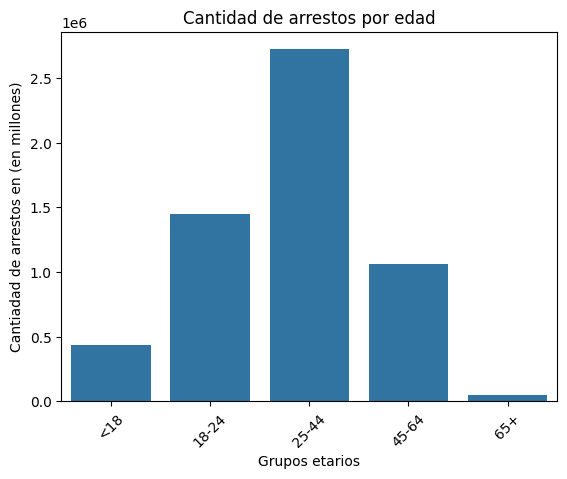

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="AGE_GROUP", order=['<18', '18-24', '25-44', '45-64', '65+'], data=arrestos)

plt.xticks(rotation=45)

plt.title("Cantidad de arrestos por edad")
plt.ylabel("Cantiadad de arrestos en (en millones)")
plt.xlabel("Grupos etarios")

plt.show()

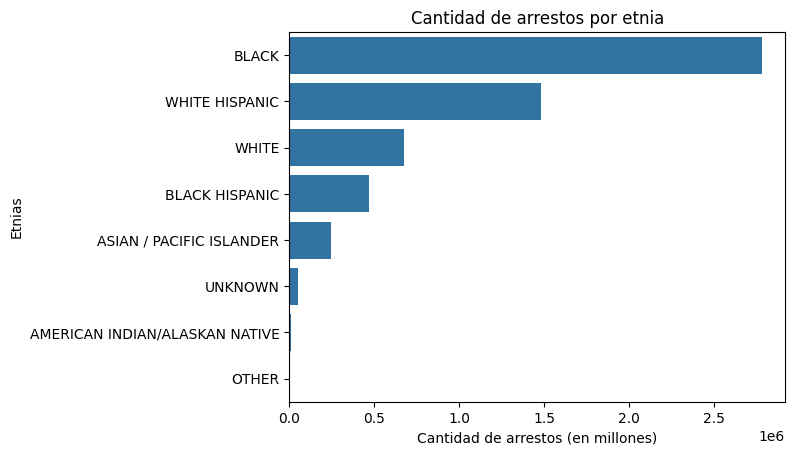

In [13]:
#Grafico que muestra la cantidad de arrestos por etnia.
sns.countplot(y="PERP_RACE", order=arrestos['PERP_RACE'].value_counts().index, data=arrestos)

plt.yticks(rotation=0)

plt.title("Cantidad de arrestos por etnia")
plt.xlabel("Cantidad de arrestos (en millones)")
plt.ylabel("Etnias")

plt.show()


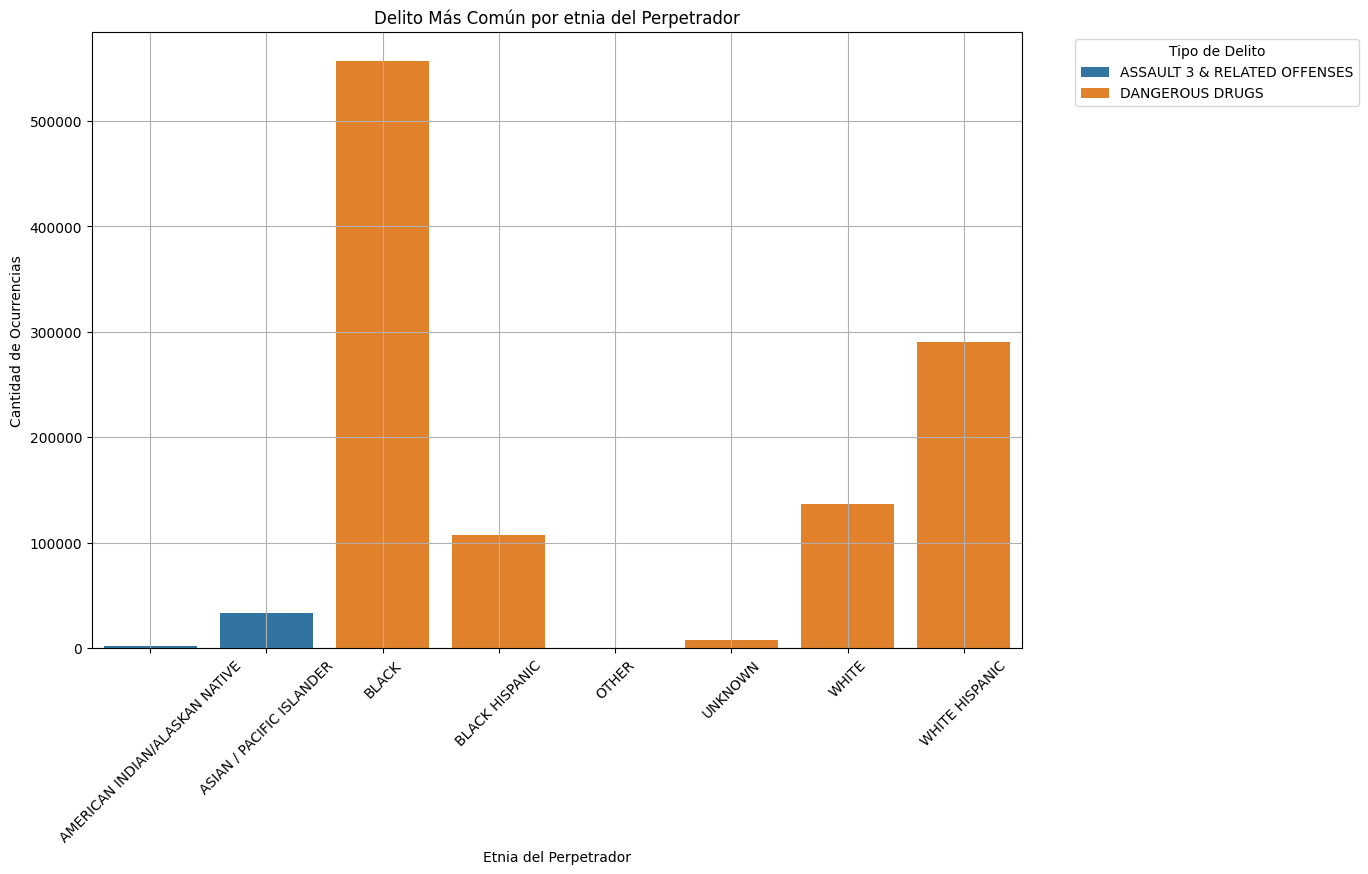

In [14]:

crime_counts = arrestos.groupby(['PERP_RACE', 'OFNS_DESC']).size().reset_index(name='counts')

most_common_crime = crime_counts.loc[crime_counts.groupby('PERP_RACE')['counts'].idxmax()]

plt.figure(figsize=(12, 8))
sns.barplot(data=most_common_crime, x='PERP_RACE', y='counts', hue='OFNS_DESC')
plt.title('Delito Más Común por etnia del Perpetrador')
plt.xlabel('Etnia del Perpetrador')
plt.ylabel('Cantidad de Ocurrencias')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Delito', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

Tipos de delitos más frecuentes en todo el dataset: ['DANGEROUS DRUGS', 'ASSAULT 3 & RELATED OFFENSES', 'OTHER OFFENSES RELATED TO THEFT', 'PETIT LARCENY', 'FELONY ASSAULT']


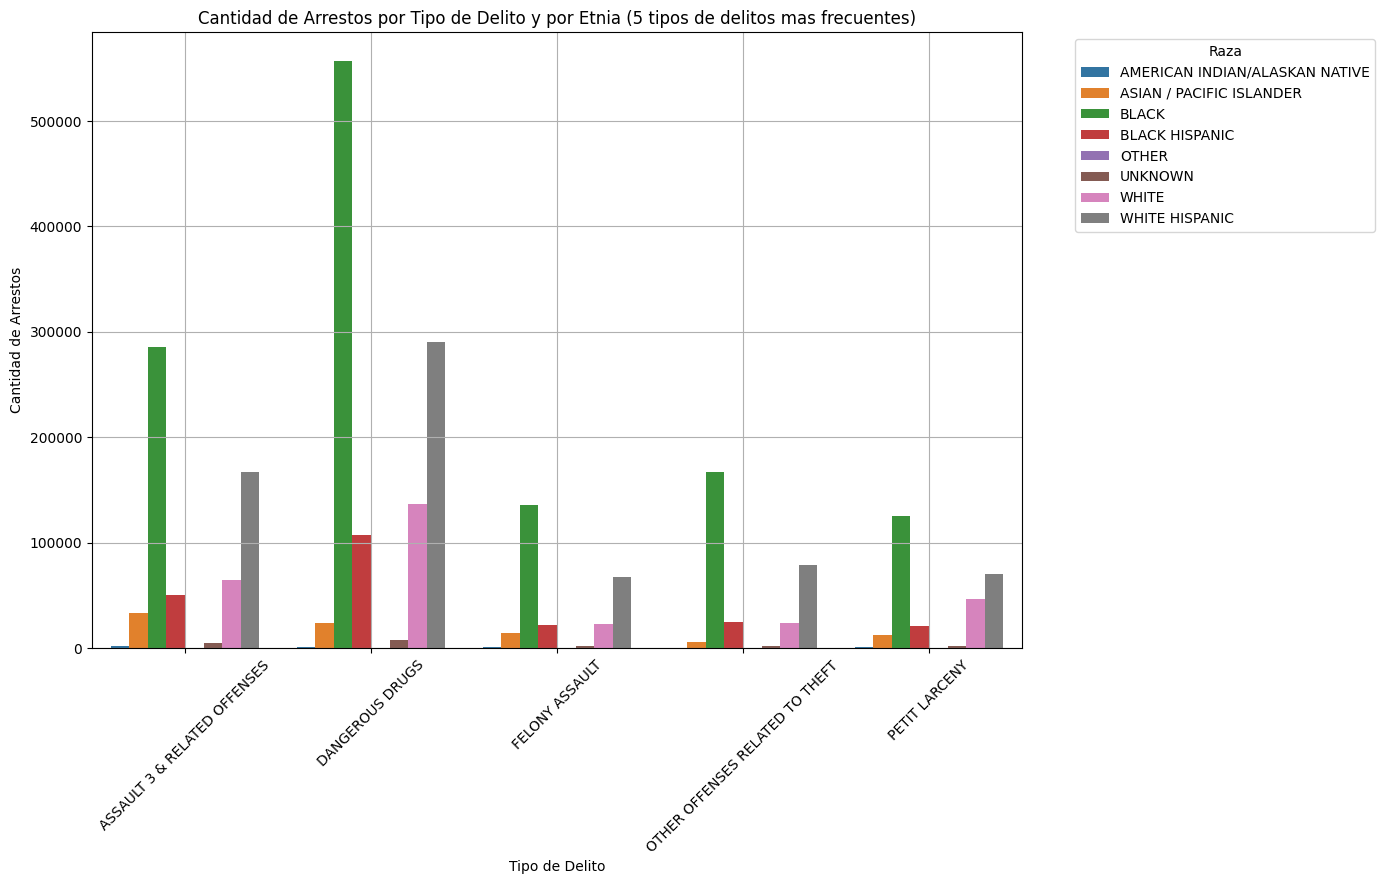

In [15]:
top_crimes = arrestos['OFNS_DESC'].value_counts().head(5).index.tolist()
print("Tipos de delitos más frecuentes en todo el dataset:", top_crimes)

df_top_crimes = arrestos[arrestos['OFNS_DESC'].isin(top_crimes)]

arrests_by_race_crime = df_top_crimes.groupby(['OFNS_DESC', 'PERP_RACE']).size().reset_index(name='arrest_count')

plt.figure(figsize=(12, 8))
sns.barplot(data=arrests_by_race_crime, x='OFNS_DESC', y='arrest_count', hue='PERP_RACE')
plt.title('Cantidad de Arrestos por Tipo de Delito y por Etnia (5 tipos de delitos mas frecuentes)')
plt.xlabel('Tipo de Delito')
plt.ylabel('Cantidad de Arrestos')
plt.xticks(rotation=45)
plt.legend(title='Raza', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

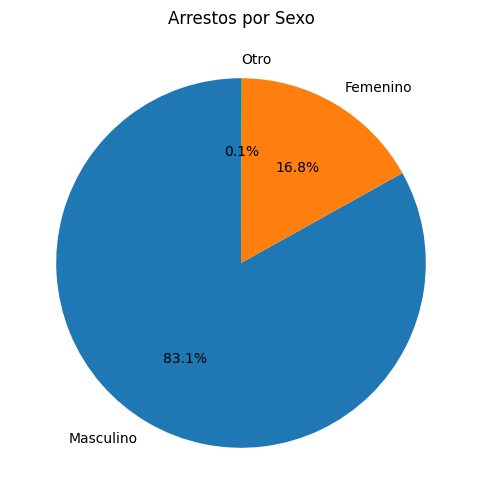

In [31]:
sex_counts = arrestos['PERP_SEX'].value_counts()


plt.figure(figsize=(6, 6))
plt.pie(sex_counts, labels=['Masculino', 'Femenino', 'Otro'], autopct='%1.1f%%', startangle=90)
plt.title('Arrestos por Sexo')
plt.show()

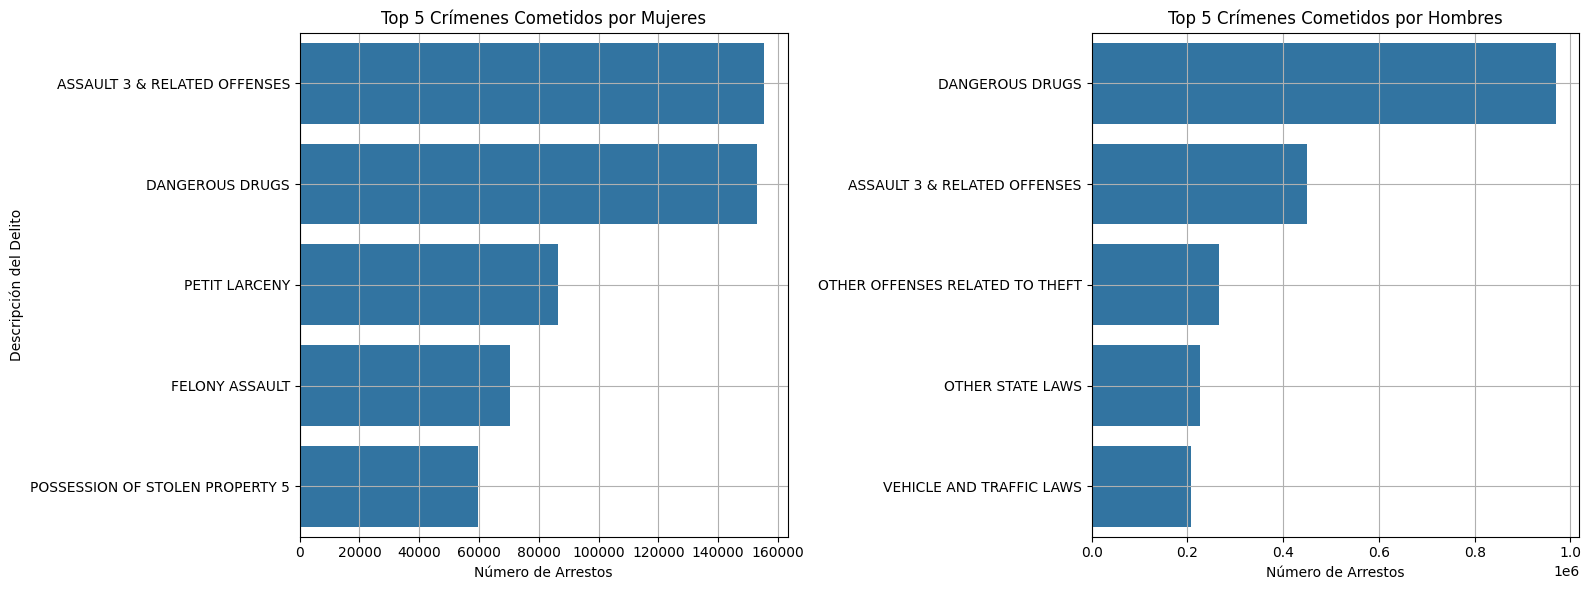

In [16]:
female_arrests = arrestos[arrestos['PERP_SEX'] == 'F']
male_arrests = arrestos[arrestos['PERP_SEX'] == 'M']

female_crime_counts = female_arrests['OFNS_DESC'].value_counts()
male_crime_counts = male_arrests['OFNS_DESC'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(y='OFNS_DESC', data=female_arrests, order=female_crime_counts.index[:5], ax=axes[0])
axes[0].set_title('Top 5 Crímenes Cometidos por Mujeres')
axes[0].set_xlabel('Número de Arrestos')
axes[0].set_ylabel('Descripción del Delito')
axes[0].grid(True)


sns.countplot(y='OFNS_DESC', data=male_arrests, order=male_crime_counts.index[:5], ax=axes[1])
axes[1].set_title('Top 5 Crímenes Cometidos por Hombres')
axes[1].set_xlabel('Número de Arrestos')
axes[1].set_ylabel('')
axes[1].grid(True)

plt.tight_layout()
plt.show()

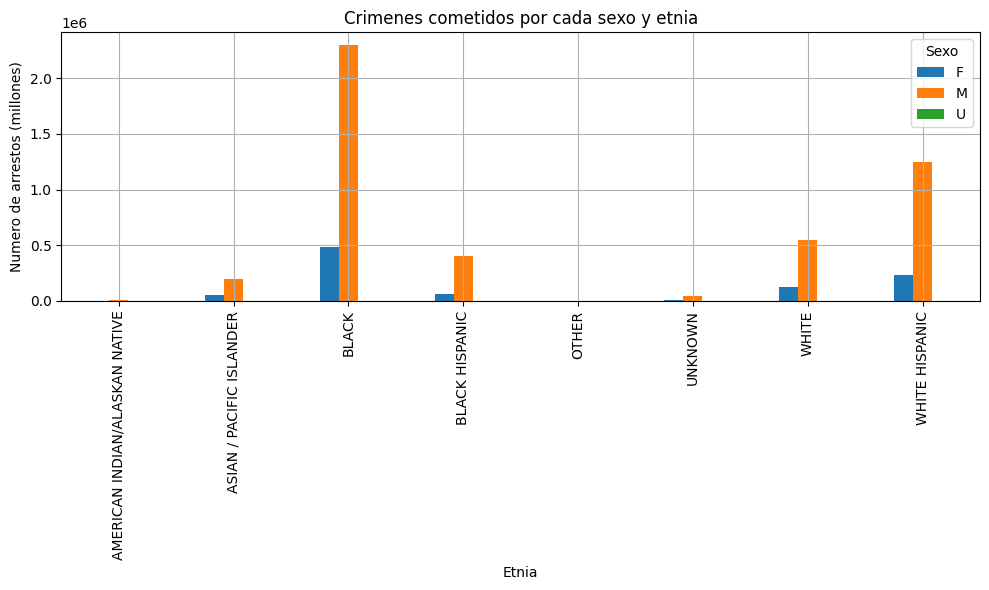

In [17]:
#Grafico que muestra cuantas mujeres y hombres arrestados hay por etnia.
arrests_by_race_sex = arrestos.groupby(['PERP_RACE', 'PERP_SEX']).size().unstack()

arrests_by_race_sex.plot(kind='bar', figsize=(10, 6))
plt.title('Crimenes cometidos por cada sexo y etnia')
plt.xlabel('Etnia')
plt.ylabel('Numero de arrestos (millones)')
plt.xticks(rotation=90)
plt.legend(title='Sexo')
plt.grid(True)
plt.tight_layout()
plt.show()

## **Mapa e información por localización**

### Mapa que muestra la cantidad de arrestos por zona de NY

In [18]:
#Usamos sample porque tarda mucho en cargar con todos los registros.

sample_size = 100000
df_sample = arrestos.sample(n=sample_size)

df_sample['Latitude'] = df_sample['Latitude'].astype(float)
df_sample['Longitude'] = df_sample['Longitude'].astype(float)

mapa_arrestos = folium.Map(location=[df_sample['Latitude'].mean(), df_sample['Longitude'].mean()], zoom_start=12)

marker_cluster = MarkerCluster().add_to(mapa_arrestos)

for idx, row in df_sample.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']]).add_to(marker_cluster)

mapa_arrestos

Output hidden; open in https://colab.research.google.com to view.

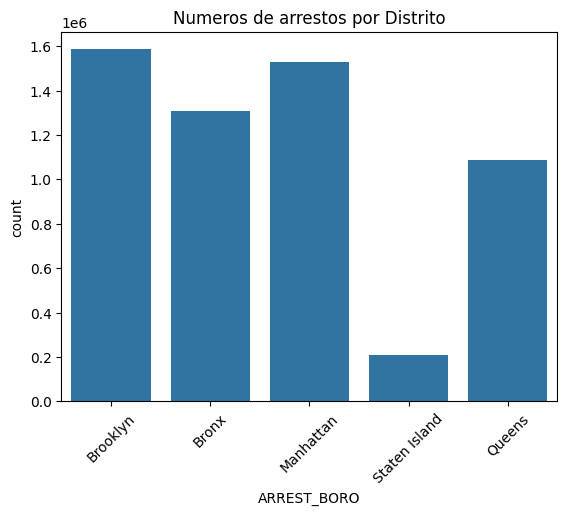

In [19]:

sns.countplot(x="ARREST_BORO", data=arrestos)

plt.xticks(rotation=45)

plt.title("Numeros de arrestos por Distrito")
plt.show()

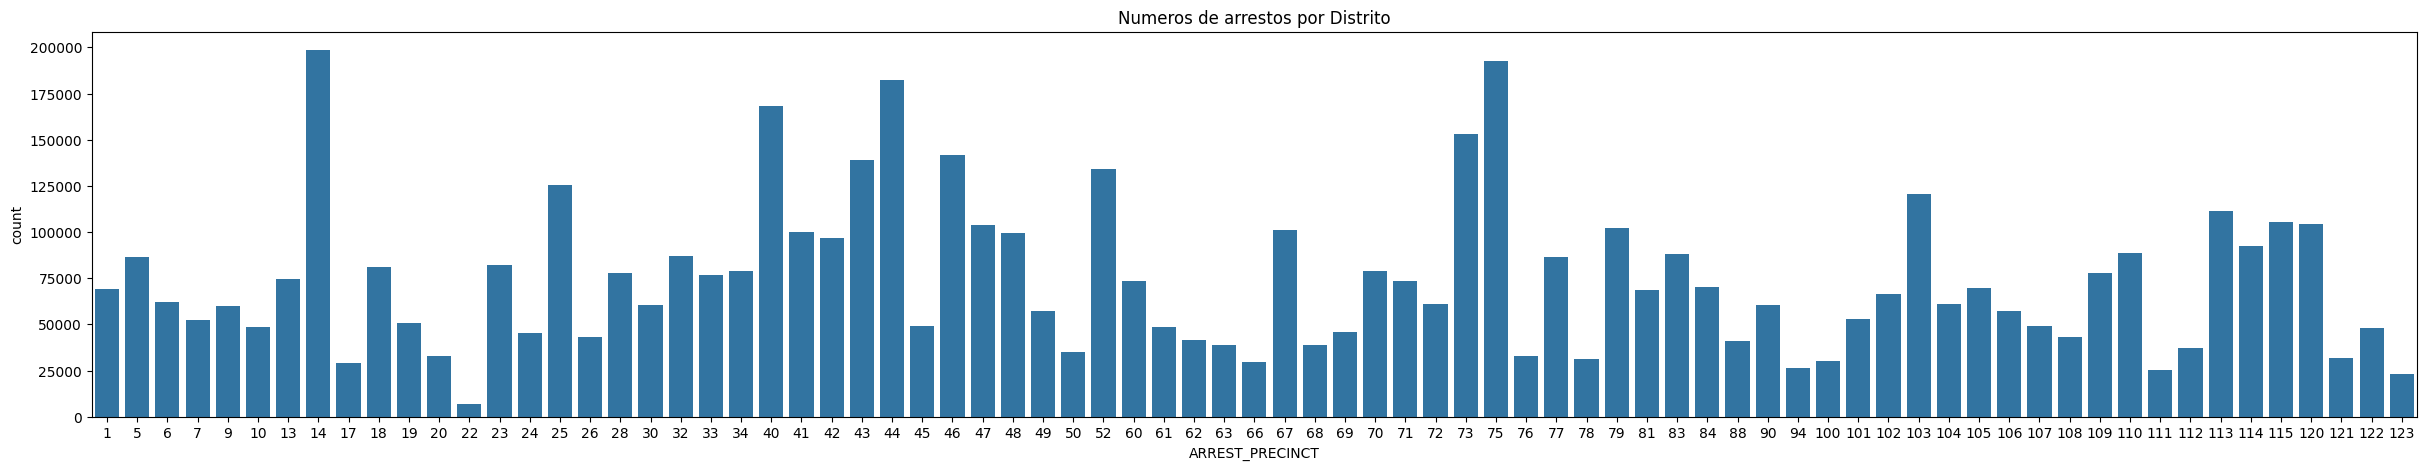

In [20]:

plt.figure(figsize=(30, 5))
sns.countplot(x="ARREST_PRECINCT", data=arrestos)


plt.title("Numeros de arrestos por Distrito")
plt.show()

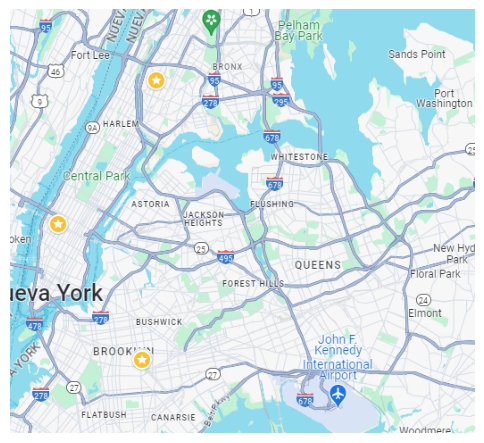

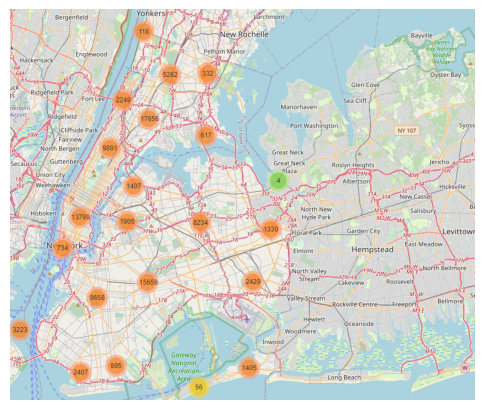

In [21]:
image_path = '/content/drive/MyDrive/Fundamentos de Python/precintos.png'
img = mpimg.imread(image_path)
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

image2_path = '/content/drive/MyDrive/Fundamentos de Python/crimentes_acumulativos.png'
img2 = mpimg.imread(image2_path)
plt.figure(figsize=(6, 6))
plt.imshow(img2)
plt.axis('off')
plt.show()

Los tres precintos de policía con más arrestros (14, 44 y 77) caen en cercanía de las ubicaciones con más crímenes según el mapa de arriba.

## **Información segun fecha**

In [22]:
arrestos['ARREST_DATE'] = pd.to_datetime(arrestos['ARREST_DATE'], errors='coerce')


In [23]:
arrestos['Mes'] = arrestos['ARREST_DATE'].dt.month
arrestos['Año'] = arrestos['ARREST_DATE'].dt.year
arrestos['Día'] = arrestos['ARREST_DATE'].dt.day

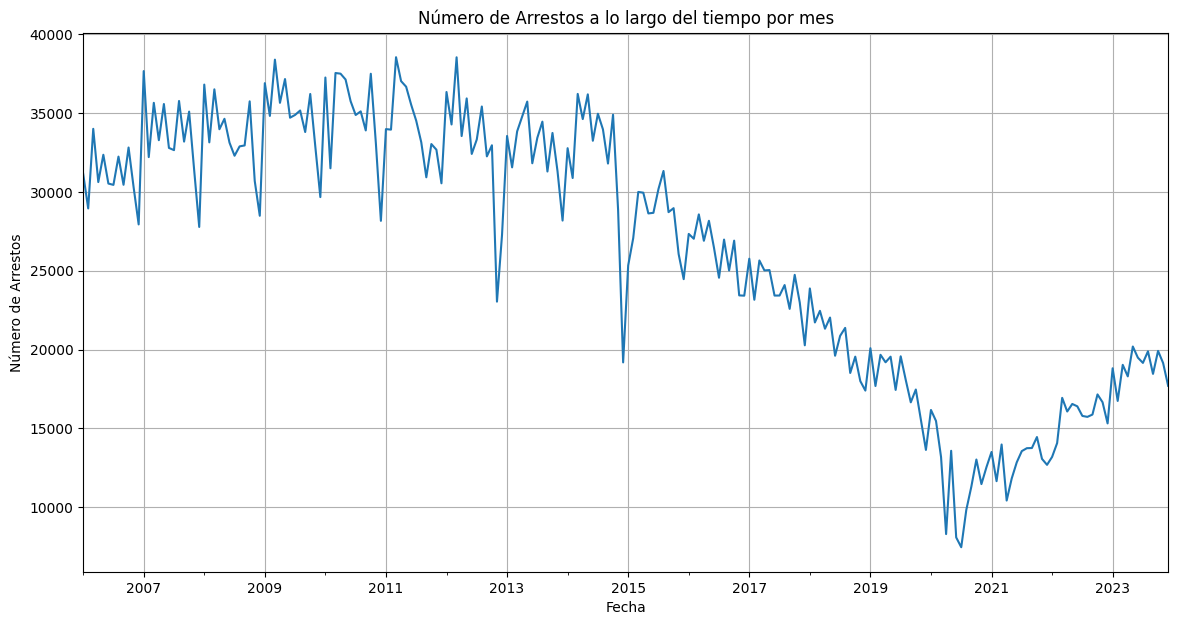

In [24]:
arrestos_por_mes = arrestos.groupby(arrestos['ARREST_DATE'].dt.to_period('M')).size()

plt.figure(figsize=(14, 7))
arrestos_por_mes.plot()
plt.title('Número de Arrestos a lo largo del tiempo por mes')
plt.xlabel('Fecha')
plt.ylabel('Número de Arrestos')
plt.grid(True)
plt.show()

In [25]:
crimenes_por_fecha = arrestos.groupby('ARREST_DATE').size()

top_5_fechas_mas = crimenes_por_fecha.sort_values(ascending=False).head(5)

top_5_fechas_menos = crimenes_por_fecha.sort_values().head(5)

print("Top 5 fechas con más arrestos:")
for date, count in top_5_fechas_mas.items():
    print(f"{date.date()} - {count}")

print("\nTop 5 fechas con menos arrestos:")
for date, count in top_5_fechas_menos.items():
    print(f"{date.date()} - {count}")

Top 5 fechas con más arrestos:
2009-05-13 - 1771
2010-01-20 - 1762
2012-03-07 - 1743
2009-02-11 - 1731
2012-02-01 - 1720

Top 5 fechas con menos arrestos:
2010-12-27 - 91
2014-12-25 - 136
2006-12-25 - 138
2021-02-01 - 139
2012-10-29 - 150


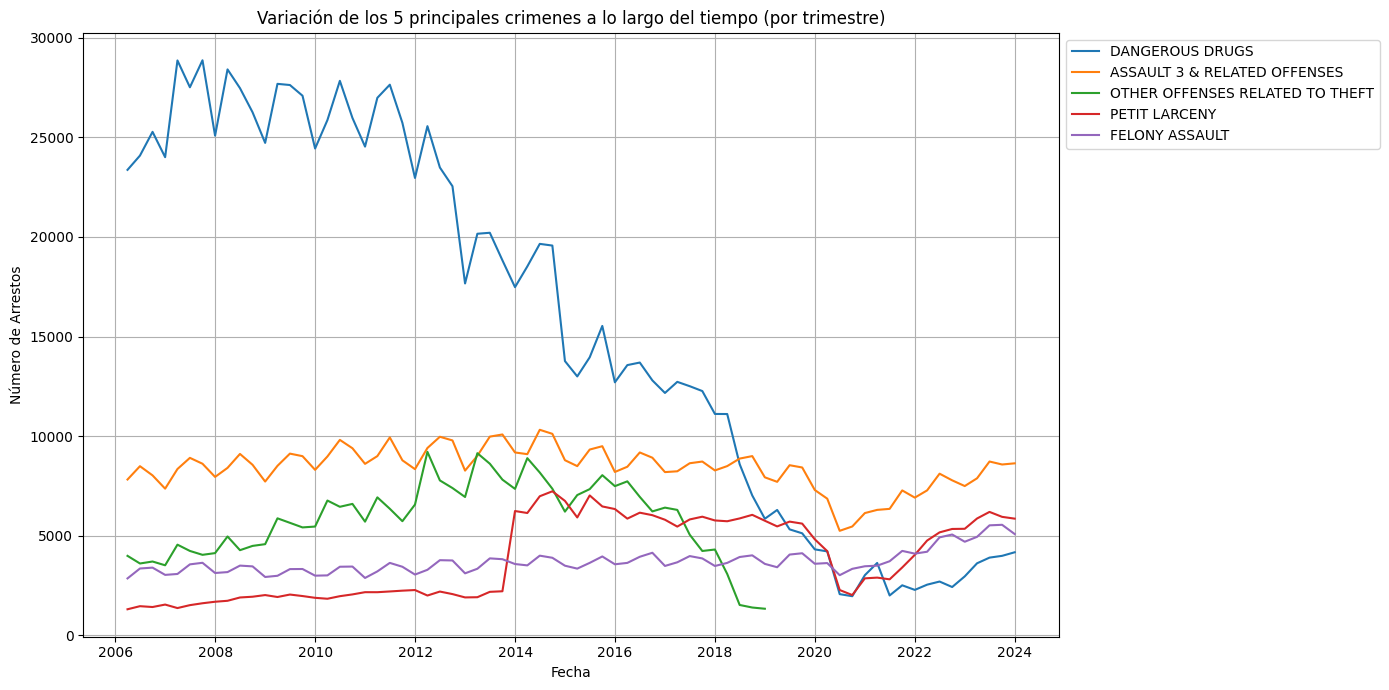

In [28]:
top_ofns_desc = arrestos['OFNS_DESC'].value_counts().head(5).index

arrestos_top_ofns = arrestos[arrestos['OFNS_DESC'].isin(top_ofns_desc)]

arrestos_por_ofns_trimestre = arrestos_top_ofns.groupby([pd.Grouper(freq='Q', key='ARREST_DATE'), 'OFNS_DESC']).size().unstack()

plt.figure(figsize=(14, 7))
colors = plt.cm.tab10.colors
for i, (ofns_desc, color) in enumerate(zip(top_ofns_desc, colors)):
    plt.plot(arrestos_por_ofns_trimestre.index, arrestos_por_ofns_trimestre[ofns_desc], label=ofns_desc, color=color)

plt.title('Variación de los 5 principales crimenes a lo largo del tiempo (por trimestre)')
plt.xlabel('Fecha')
plt.ylabel('Número de Arrestos')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

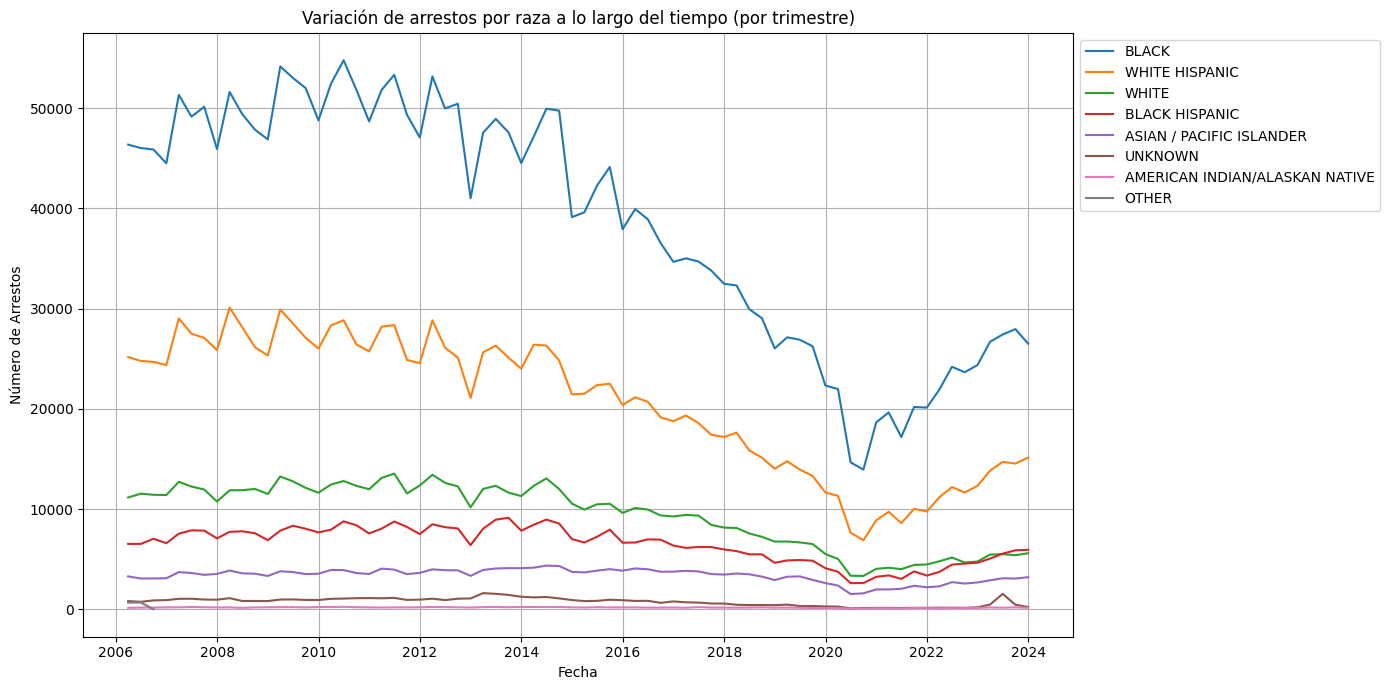

In [27]:
top_perp_race = arrestos['PERP_RACE'].value_counts().index

arrestos_top_race = arrestos[arrestos['PERP_RACE'].isin(top_perp_race)]

arrestos_por_race_trimestre = arrestos_top_race.groupby([pd.Grouper(freq='Q', key='ARREST_DATE'), 'PERP_RACE']).size().unstack()

plt.figure(figsize=(14, 7))
colors = plt.cm.tab10.colors
for i, (race, color) in enumerate(zip(top_perp_race, colors)):
    plt.plot(arrestos_por_race_trimestre.index, arrestos_por_race_trimestre[race], label=race, color=color)

plt.title('Variación de arrestos por raza a lo largo del tiempo (por trimestre)')
plt.xlabel('Fecha')
plt.ylabel('Número de Arrestos')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

En general, la caída profunda en 2020 puede y tiende a explicarse como una consecuencia de las medidas tomadas en pandemia (toque de queda, etc.) con una posterior normalización de los números. Sin embargo, se puede ver claramente que los valores en los crímenes venían bajando rotundamente desde el 2014. Es cierto que hubo una caída dramática en los números en pandemia, y eso resulta razonable, pero sin embargo existe también una tendencia a la suba posterior. Esta suba no debe asociarse a una normalización de los números pues los mismos venían en caída desde hace años. De hecho, una explicación alternativa indica que se produjo una subida consecuencia del incremento del desempleo y la crisis inflacionaria posterior a la pandemia. Este último punto parte de que un incremento en los precios, dramático, como fue para USA los primeros años posteriores la pandemia, resultan en un rezago sobre los valores de los productos que se mantiene elevado, incluso si el índice de inflación comienza a bajar. Hipotetizamos que el índice inflacionario podría ajustarse a ser la derivada de la curva del incremento de los crímenes en este caso, ajustandóse a una línea basal del 2 al 5% que son valores considerados económicamente saludables. Se suma a todo esto que el rezago en los sueldos, que se mantienen bajos tras un fuerte incremento inflacionario, amplifica el impacto y justifica también la demora en la baja de los crímenes.

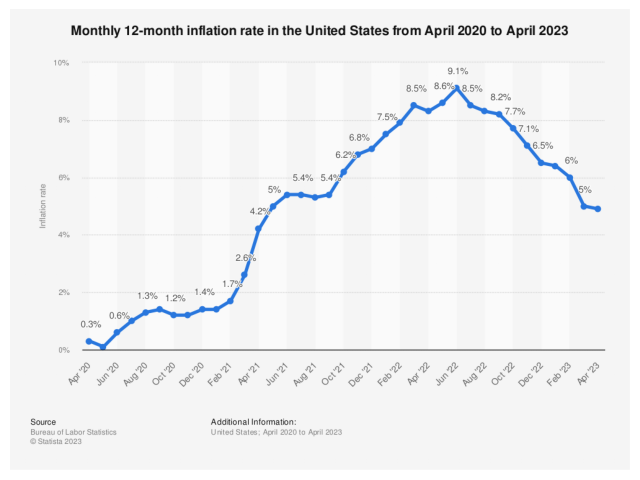

In [29]:
image3_path = '/content/drive/MyDrive/Fundamentos de Python/inflacion.png'
img3 = mpimg.imread(image3_path)
plt.figure(figsize=(8, 8))
plt.imshow(img3)
plt.axis('off')
plt.show()